In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from nivEDM import *
import matplotlib.pyplot as plt

In [2]:
# Simulating Halvorsen system (cuz Lorenz is overdone and boring)
def halvorsen_system(t, state, a=1.69):
    x, y, z = state
    return [-a*x-4*y-4*z-y**2, -a*y-4*z-4*x-z**2, -a*z-4*x-4*y-x**2]

# Initial condition and time points
initial_state = [-4.32, -3.82, 4.78]
t = np.linspace(0, 600, 30000)  # time points

# Solve the system
solution = solve_ivp(halvorsen_system, [t.min(), t.max()], initial_state, t_eval=t)
data_matrix = solution.y.T  # Transpose to get the matrix in the required format

# subsample clean data, for faster calculation
# ideally this subsampling size is related to the decorrelation scale
sub = 5
data_matrix = data_matrix[::sub,:]
t=t[::sub]

In [3]:
# split data
split_fraction = 0.7  # Adjust this to your desired fraction
# Calculate the index at which to split the dataset
split_index = int(len(data_matrix) * split_fraction)

# Split the data matrix into training and testing sets
train_data = data_matrix[:split_index]
t_train = t[:split_index]

test_data = data_matrix[(split_index):]
t_test = t[(split_index):]

In [4]:
# predict the next state of the system (every dimension is predicted at once)
predicti = []
current_point = train_data[-1]
for i in range(len(train_data), len(data_matrix)):
    next_point_prediction = predict_next_point(data_matrix[:i], current_point, 5, 1)
    predicti.append(next_point_prediction)
    current_point = predicti[-1]
    
predictions = np.array(predicti)
predictions.shape, test_data.shape  # Check the shape of predictions and test data

((1800, 3), (1800, 3))

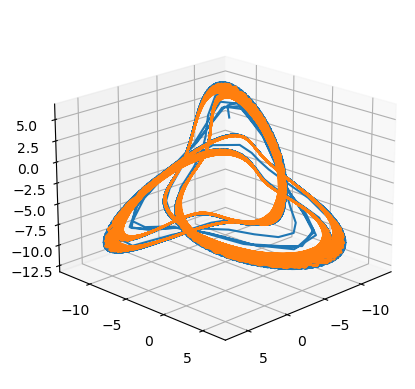

In [5]:
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=20, azim=45, roll=0)
ax.plot(data_matrix[:,0],data_matrix[:,1],data_matrix[:,2])
ax.plot(predictions[:,0],predictions[:,1],predictions[:,2])

In [8]:
# predict only one variable (the first column of the data matrix)
# predicts 'ahead' based on previous state of the rest of the variables.

# for to be sure no data leakage
datrem = data_matrix.copy()
datrem[:,0] = np.nan

ahead = 2 # predict two timesteps ahead
predicti = []
current_point = train_data[-1]
for i in range(len(train_data), len(data_matrix)):
    next_point_prediction = predict_first(data_matrix[:i], current_point, 10, 1,ahead)
    predicti.append(next_point_prediction)
    current_point = datrem[i]
    
predictions = np.array(predicti)
predictions.shape, test_data.shape  # Check the shape of predictions and test data

((1800,), (1800, 3))

(550.0, 600.0)

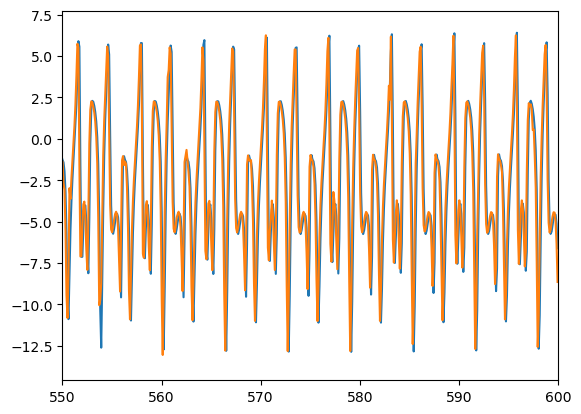

In [9]:
ax = plt.figure().add_subplot()

ax.plot(t_test,test_data[:,0])
ax.plot(t_test,predictions)
ax.set_xlim([550, 600])